In [1620]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [1621]:
X, y= make_classification(n_samples= 100, n_features= 2, n_informative= 2, n_redundant= 0, n_classes=2, n_clusters_per_class= 1, hypercube= False, class_sep= 5)

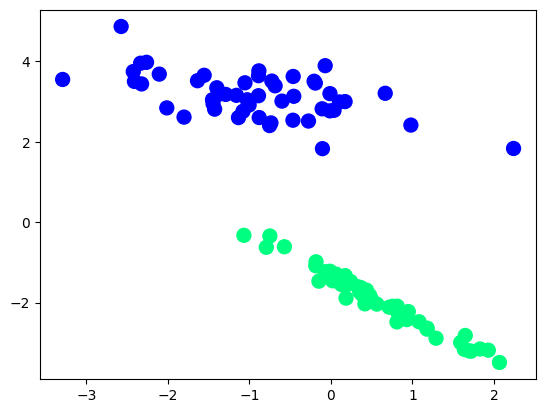

In [1622]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap= 'winter', s=100)

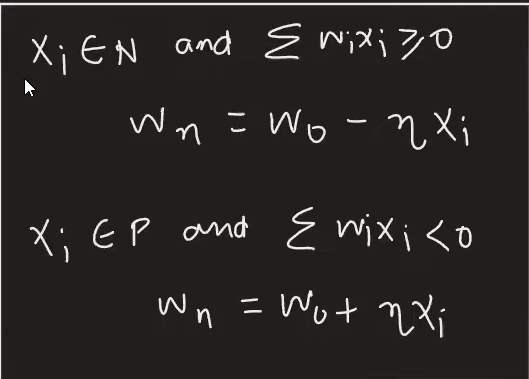
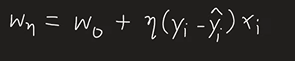

In [1623]:
def step(z):
    return 1 if z>0 else 0

In [1624]:
def perceptron(X, y, epochs=1000):
    X = np.insert(X, 0, 1, axis= 1)
    weights = np.ones(X.shape[1])
    lr = 0.01
    
    for i in range(epochs):
        j  = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat)*X[j]
        
    return weights[0], weights[1:]

In [1625]:
intercept_, coef_ = perceptron(X, y)

In [1626]:
intercept_

np.float64(0.5799999999999996)

In [1627]:
coef_

array([ 0.83503581, -0.65911397])

In [1628]:
m = -(coef_[0]/coef_[1])
b= -(intercept_/coef_[1])

In [1629]:
x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + b

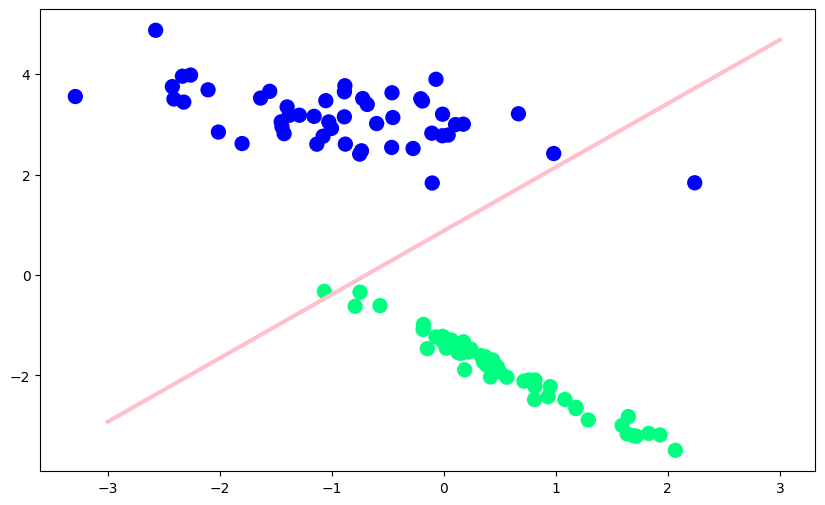

In [1630]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color= 'pink', linewidth= 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

In [1631]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X, y)

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_ / lor.coef_[0][1])

x_input1 = np.linspace(-3, 3, 100)
y_input1 = m*x_input1 + b

In [1632]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [1633]:
def perceptron2(X, y, epochs= 1000):
    X = np.insert(X, 0, 1, axis= 1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(epochs):
        j = np.random.randint(0, 100)
        y_hat = sigmoid(np.dot(X[j], weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    
    return weights[0], weights[1:]

In [1634]:
intcept_, cof_ = perceptron2(X, y)
print(intcept_, cof_)

1.240996158867522 [ 0.26555181 -2.82378896]


In [1635]:
m = -(cof_[0]/cof_[1])
b = -(intcept_/cof_[1])

In [1636]:
x_input2 = np.linspace(-3, 3, 100)
y_input2 = m*x_input2 + b

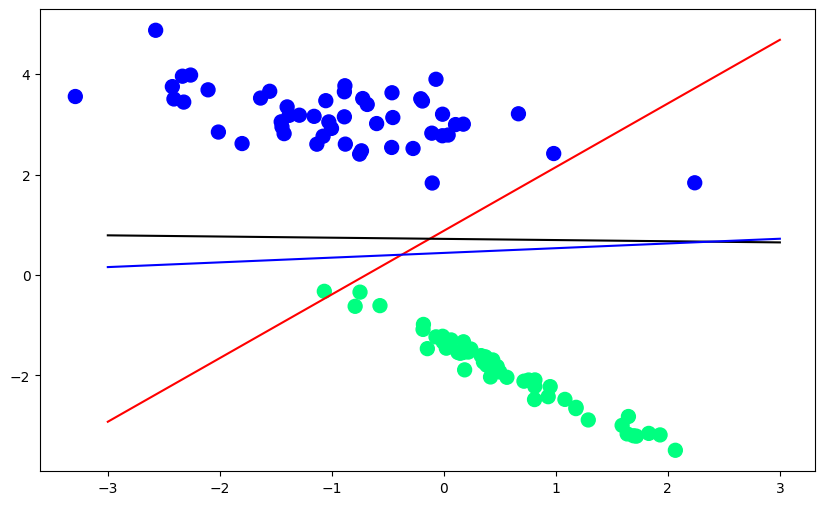

In [1637]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap= 'winter', s=100)
plt.plot(x_input, y_input, color= 'red')
plt.plot(x_input1, y_input1, color='black')
plt.plot(x_input2, y_input2, color= 'blue')
plt.show()

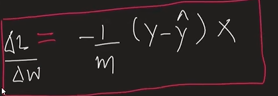

In [1638]:
def gdr(X, y, epochs= 6000, lr= 0.2):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    
    for i in range(epochs):
        print("Epoch :", i,weights)
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights + lr*(np.dot((y-y_hat), X)/X.shape[0])

    return weights[1:], weights[0]

In [1639]:
coef_, intercept_ = gdr(X, y)
m = -(coef_[0]/coef_[1])
b= -(intercept_/coef_[1])

Epoch : 0 [1. 1. 1.]
Epoch : 1 [0.96427959 1.11817469 0.58722586]
Epoch : 2 [0.92195037 1.19832731 0.26246704]
Epoch : 3 [0.88732265 1.24241102 0.02828223]
Epoch : 4 [ 0.86251812  1.26548935 -0.14210094]
Epoch : 5 [ 0.84499596  1.27764213 -0.27191569]
Epoch : 6 [ 0.83243817  1.28379061 -0.37535463]
Epoch : 7 [ 0.8232855   1.28638189 -0.46084628]
Epoch : 8 [ 0.81653439  1.28672132 -0.53355085]
Epoch : 9 [ 0.81152962  1.28555702 -0.59676961]
Epoch : 10 [ 0.80783065  1.28334547 -0.65270917]
Epoch : 11 [ 0.80513185  1.28038022 -0.70290359]
Epoch : 12 [ 0.80321499  1.27685849 -0.74845634]
Epoch : 13 [ 0.80192014  1.27291767 -0.79018469]
Epoch : 14 [ 0.80112743  1.26865646 -0.82870925]
Epoch : 15 [ 0.80074523  1.26414759 -0.86451156]
Epoch : 16 [ 0.80070226  1.25944588 -0.89797231]
Epoch : 17 [ 0.80094225  1.25459346 -0.92939738]
Epoch : 18 [ 0.80142019  1.2496232  -0.95903606]
Epoch : 19 [ 0.80209963  1.24456116 -0.98709414]
Epoch : 20 [ 0.80295074  1.23942825 -1.0137434 ]
Epoch : 21 [ 0.80

In [1640]:
x_input3 = np.linspace(-3, 3, 100)
y_input3 = m*x_input3 + b

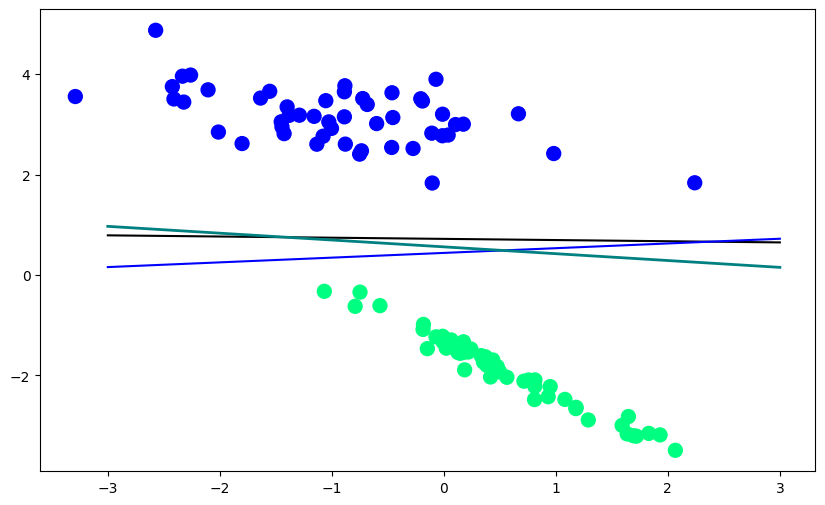

In [1641]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap= 'winter', s=100)
# plt.plot(x_input, y_input, color= 'red')
plt.plot(x_input1, y_input1, color='black')
plt.plot(x_input2, y_input2, color= 'blue')
plt.plot(x_input3, y_input3, color= 'teal',linewidth= 2 )
plt.show()